In [8]:
import numpy as np

In [9]:
import matplotlib.pyplot       as plt
import matplotlib.colors       as mcolors
import matplotlib.patches      as mpatches
import matplotlib.transforms   as mtransforms
import matplotlib.font_manager as font_manager
%matplotlib inline

In [1]:
import re
from collections import defaultdict

def parse_log_line(line):
    pattern = r'([\w.]+)=([^|\s]+)'
    matches = re.findall(pattern, line)
    
    return dict(matches)

def parse_log_file(file_path):
    parsed_data = []
    
    with open(file_path, 'r') as file:
        for line in file:
            parsed_line = parse_log_line(line.strip())
            if parsed_line:  # Only add non-empty dictionaries
                parsed_data.append(parsed_line)
    
    return parsed_data

### Preactivation and Activation

In [2]:
log_file_path = 'mfxx49820_test.2024_0628_2311_24.act.log'
parsed_data = parse_log_file(log_file_path)

In [3]:
parsed_data[0]

{'rank': '0',
 'iteration': '1',
 'logevent': 'DYNAMICS:ACT',
 'name': '_fsdp_wrapped_module.vit.encoder.layer.0._fsdp_wrapped_module._checkpoint_wrapped_module.intermediate.intermediate_act_fn',
 'preact.mean': '-0.0016279220581054688',
 'preact.std': '0.1126708984375',
 'act.mean': '0.00421905517578125',
 'act.std': '0.056793212890625'}

In [8]:
set([ d.get('logevent') for d in parsed_data ])

{'DYNAMICS:ACT'}

In [15]:
k = '_fsdp_wrapped_module.vit.encoder.layer.2._fsdp_wrapped_module._checkpoint_wrapped_module.intermediate.intermediate_act_fn'

In [16]:
preacts = np.array([ float(d.get('preact.mean')) for d in parsed_data if d.get('name') == k ])

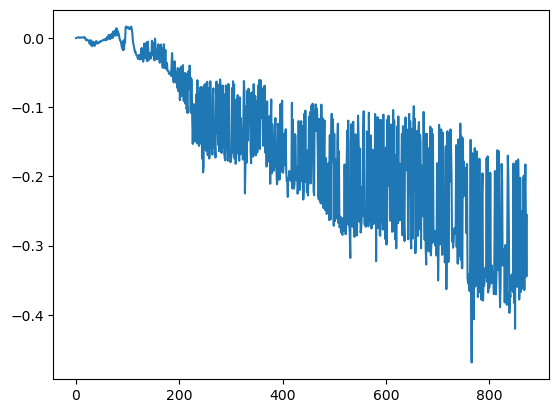

In [17]:
plt.plot(preacts)

### Percent Parameter Update (Log10 scale)

In [32]:
log_file_path = 'mfxx49820_test.2024_0629_0012_51.dynamics.log'
parsed_data = parse_log_file(log_file_path)

In [33]:
parsed_data[-1]

{'rank': '0',
 'iteration': '761',
 'logevent': 'DYNAMICS:PARAMS',
 'type': 'decoder',
 'name': '7._fsdp_wrapped_module._checkpoint_wrapped_module.attention.attention.key.weight',
 'update': '-4.7598557472229'}

In [66]:
ks = sorted(set([ d.get('name') for d in parsed_data if '.weight'in d.get('name') ]))
ks[:10]

['0._fsdp_wrapped_module._checkpoint_wrapped_module.attention.attention.key.weight',
 '0._fsdp_wrapped_module._checkpoint_wrapped_module.attention.attention.query.weight',
 '1._fsdp_wrapped_module._checkpoint_wrapped_module.attention.attention.key.weight',
 '1._fsdp_wrapped_module._checkpoint_wrapped_module.attention.attention.query.weight',
 '2._fsdp_wrapped_module._checkpoint_wrapped_module.attention.attention.key.weight',
 '2._fsdp_wrapped_module._checkpoint_wrapped_module.attention.attention.query.weight',
 '3._fsdp_wrapped_module._checkpoint_wrapped_module.attention.attention.key.weight',
 '3._fsdp_wrapped_module._checkpoint_wrapped_module.attention.attention.query.weight',
 '4._fsdp_wrapped_module._checkpoint_wrapped_module.attention.attention.key.weight',
 '4._fsdp_wrapped_module._checkpoint_wrapped_module.attention.attention.query.weight']

In [55]:
dyns = [
    [ float(d.get('update')) for d in parsed_data if d.get('name') == k ]
    for k in ks
]

In [57]:
dyn_cat = np.concatenate([dyns], axis = 0)
dyn_cat.shape

(40, 761)

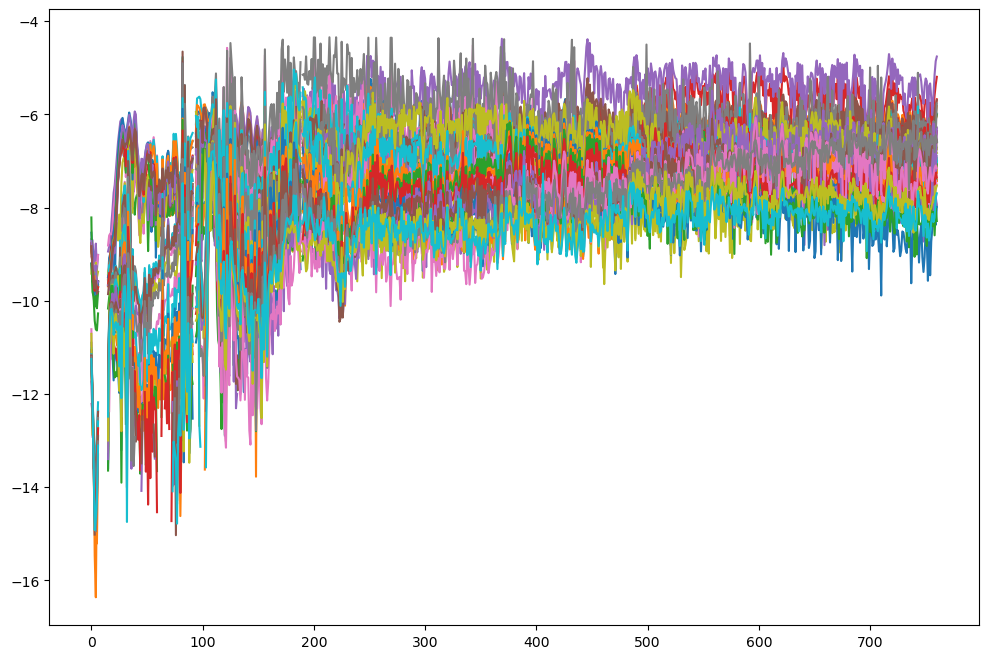

In [65]:
# Create the plot
plt.figure(figsize=(12, 8))

# Plot each row of the data
for i in range(dyn_cat.shape[0]):
    plt.plot(range(dyn_cat.shape[1]), dyn_cat[i], label=f'{ks[i]}')
# plt.legend()
